# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** [Elsa Mundi]
- **Email:** [elsamundiraswati@gmail.com]
- **ID Dicoding:** [elsaamndi]

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi kualitas udara di  lokasi Changping selama periode waktu tertentu?
-Faktor-faktor apa yang paling berkontribusi terhadap peningkatan atau penurunan kualitas udara di daerah Changping tersebut?

## Import Semua Packages/Library yang Digunakan

In [5]:
#
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [7]:
import pandas as pd

df = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')

### Assessing Data

In [8]:
# periksa struktur data
print(df.info())
print(df.describe())

# periksa nilai yang hilang
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
                 No          year         month           day  

### Cleaning Data

In [12]:


# Mengatasi nilai yang hilang (missing values)
# Mengisi nilai yang hilang dengan interpolasi linier
df['PM2.5'] = df['PM2.5'].interpolate(method='linear')
df['PM10'] = df['PM10'].interpolate(method='linear')
df['SO2'] = df['SO2'].interpolate(method='linear')
df['NO2'] = df['NO2'].interpolate(method='linear')
df['CO'] = df['CO'].interpolate(method='linear')
df['O3'] = df['O3'].interpolate(method='linear')
df['TEMP'] = df['TEMP'].interpolate(method='linear')
df['PRES'] = df['PRES'].interpolate(method='linear')
df['DEWP'] = df['DEWP'].interpolate(method='linear')
df['RAIN'] = df['RAIN'].interpolate(method='linear')
df['wd'] = df['wd'].fillna(df['wd'].mode()[0])
df['WSPM'] = df['WSPM'].interpolate(method='linear')

# Periksa kembali nilai yang hilang setelah interpolasi
print(df.isnull().sum())

# Konversi tipe data jika diperlukan
for col in ['year', 'month', 'day', 'hour']:
    df[col] = df[col].astype(int)

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

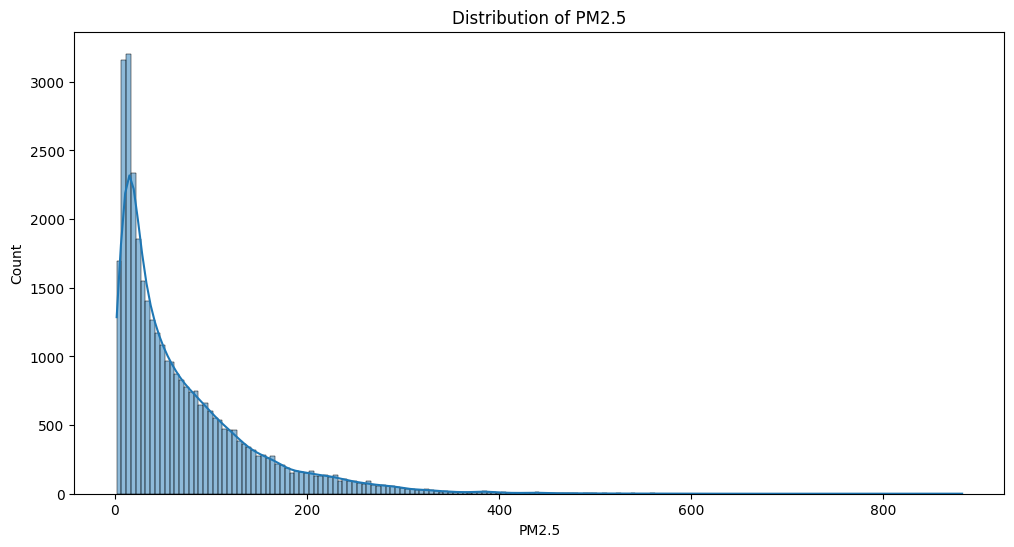

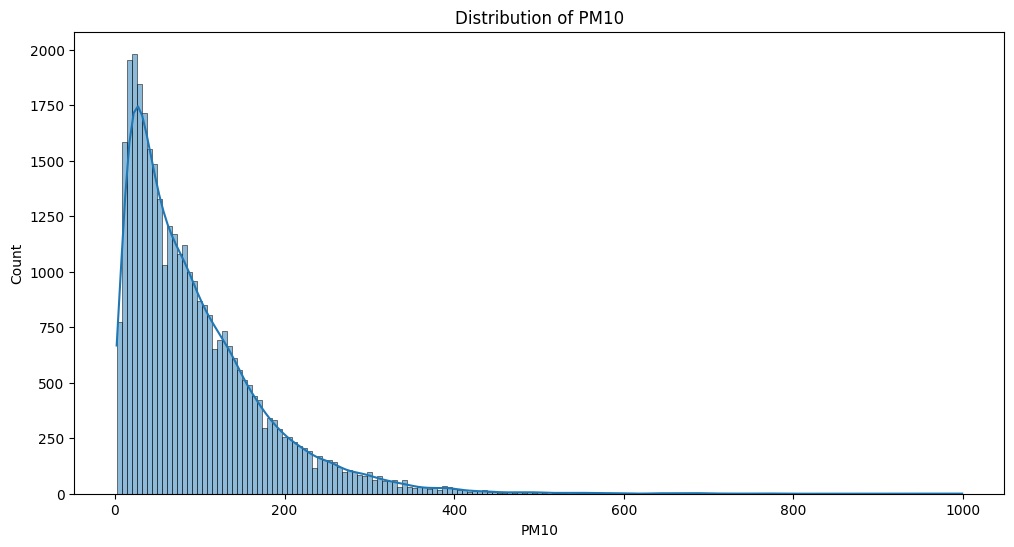

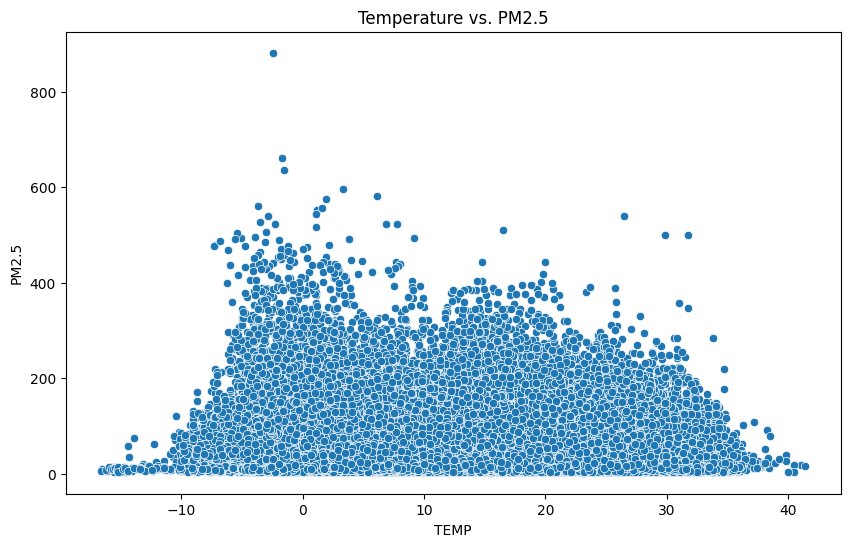

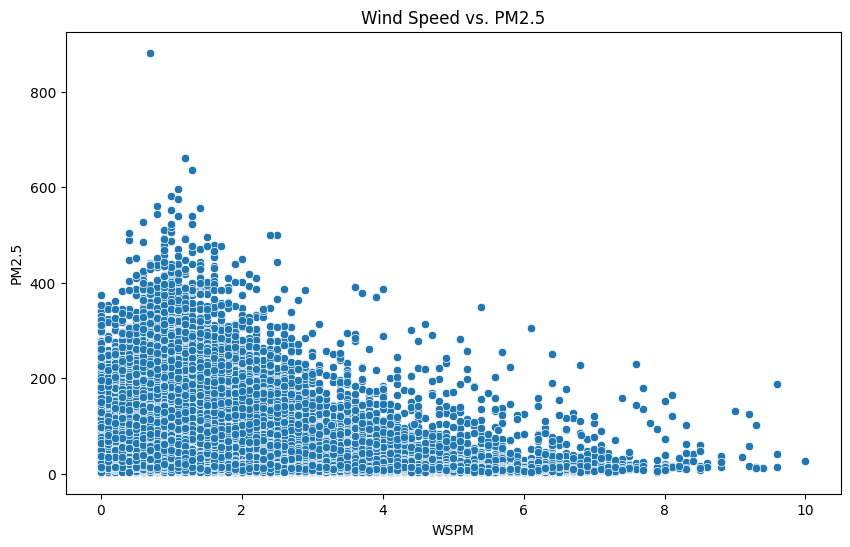

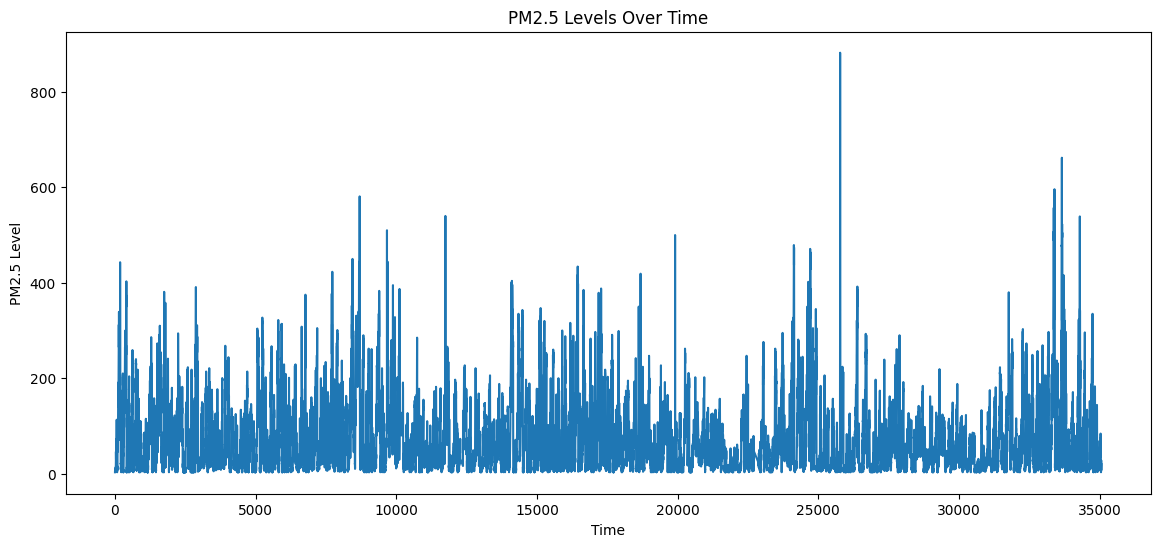

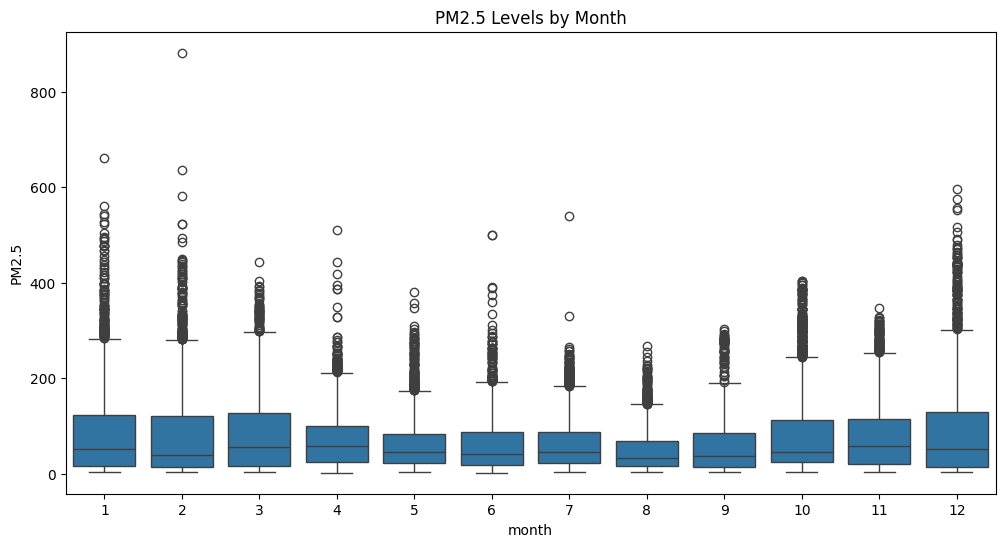

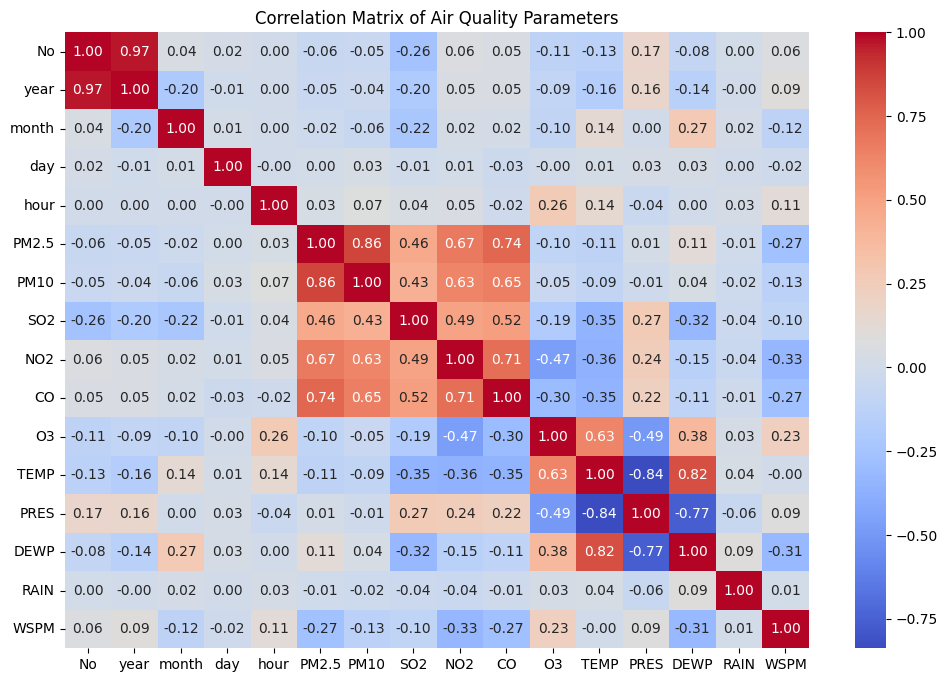

In [15]:

plt.figure(figsize=(12, 6))
sns.histplot(df['PM2.5'], kde=True)
plt.title('Distribution of PM2.5')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['PM10'], kde=True)
plt.title('Distribution of PM10')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=df)
plt.title('Temperature vs. PM2.5')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=df)  # Wind speed
plt.title('Wind Speed vs. PM2.5')
plt.show()



plt.figure(figsize=(14, 6))
plt.plot(df['PM2.5'])
plt.xlabel('Time')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Levels Over Time')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='PM2.5', data=df)
plt.title('PM2.5 Levels by Month')
plt.show()

numerical_features = df.select_dtypes(include=np.number)

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Parameters')
plt.show()

## Visualization & Explanatory Analysis

### Bagaimana variasi kualitas udara di  lokasi Changping selama periode waktu tertentu?

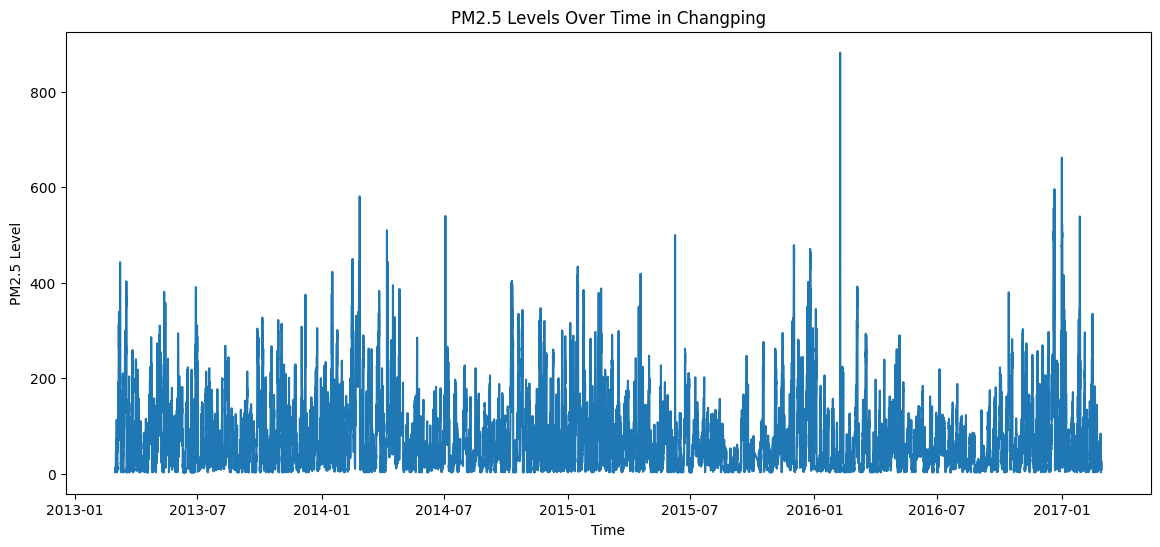

<ipython-input-25-2c518c613f91>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm25 = df.resample('M')['PM2.5'].mean()  # Calculate monthly average PM2.5


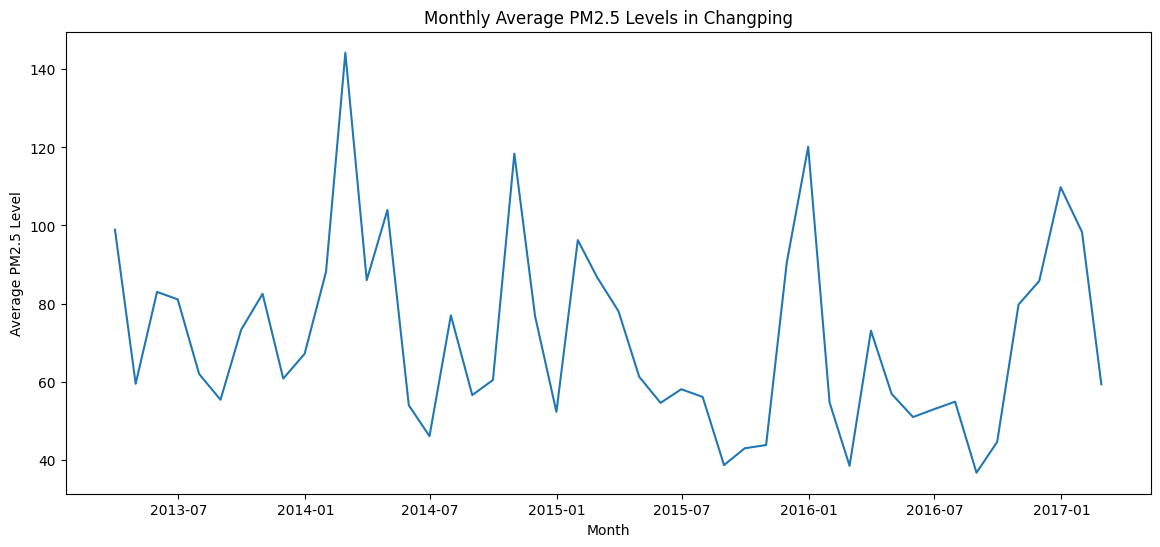

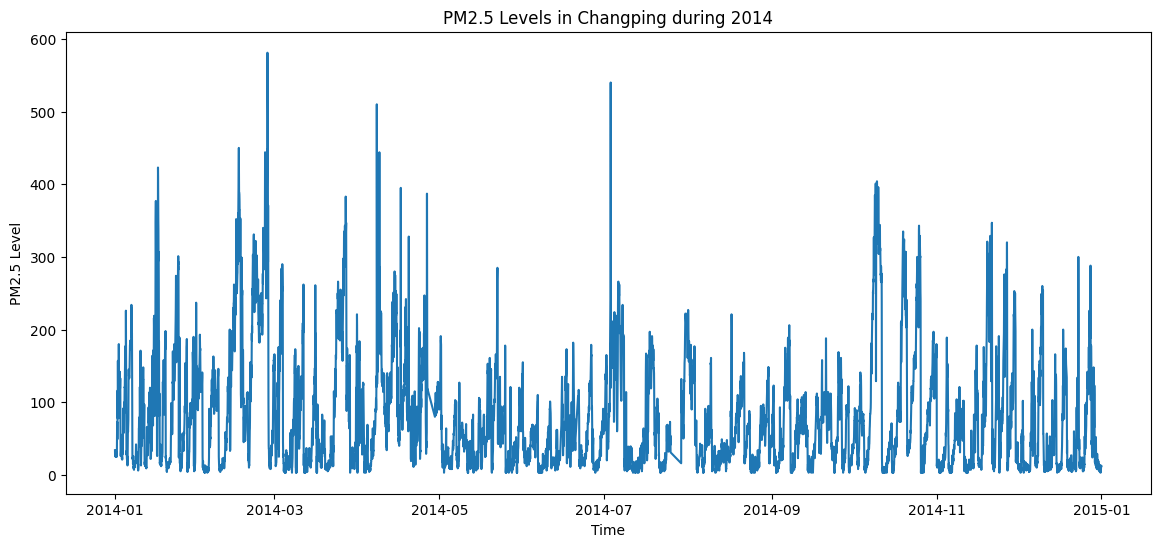

In [25]:

import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Set 'Date' as the index
df = df.set_index('Date')


# Plotting PM2.5 levels over time
plt.figure(figsize=(14, 6))
plt.plot(df['PM2.5'])
plt.xlabel('Time')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Levels Over Time in Changping')
plt.show()


# Analyze monthly variations in PM2.5
monthly_pm25 = df.resample('M')['PM2.5'].mean()  # Calculate monthly average PM2.5

plt.figure(figsize=(14, 6))
plt.plot(monthly_pm25)
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.title('Monthly Average PM2.5 Levels in Changping')
plt.show()


#  Analyze variations over a specific period (e.g., 2014)
df_2014 = df.loc['2014'] # Use .loc[] to select rows based on the year in the index
plt.figure(figsize=(14, 6))
plt.plot(df_2014['PM2.5'])
plt.xlabel('Time')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Levels in Changping during 2014')
plt.show()


### Faktor-faktor apa yang paling berkontribusi terhadap peningkatan atau penurunan kualitas udara di daerah Changping tersebut?

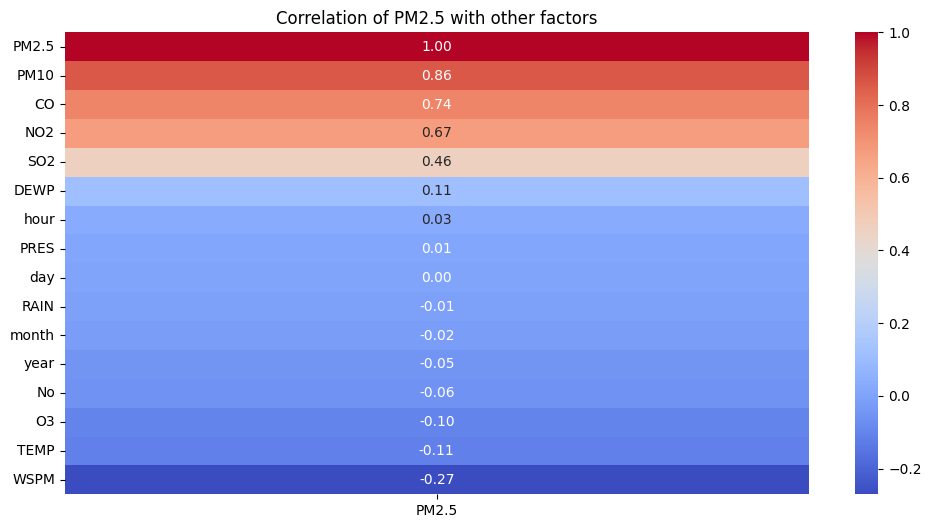

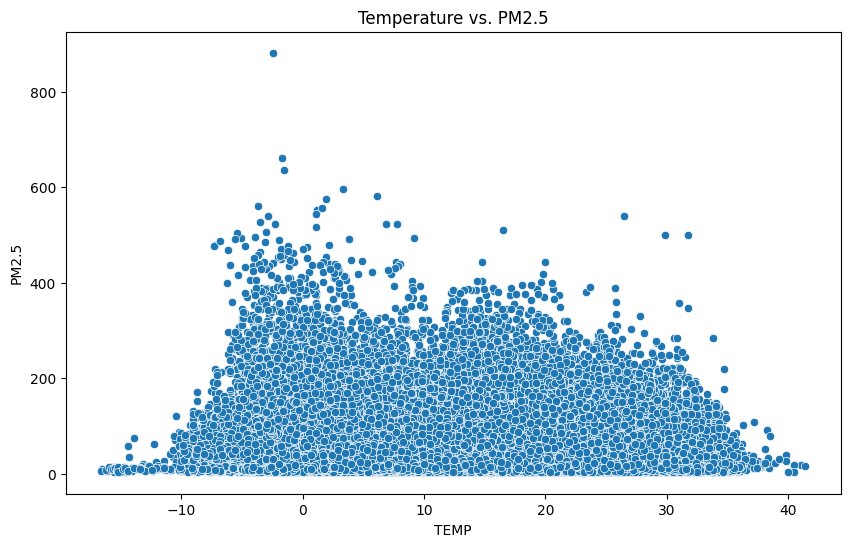

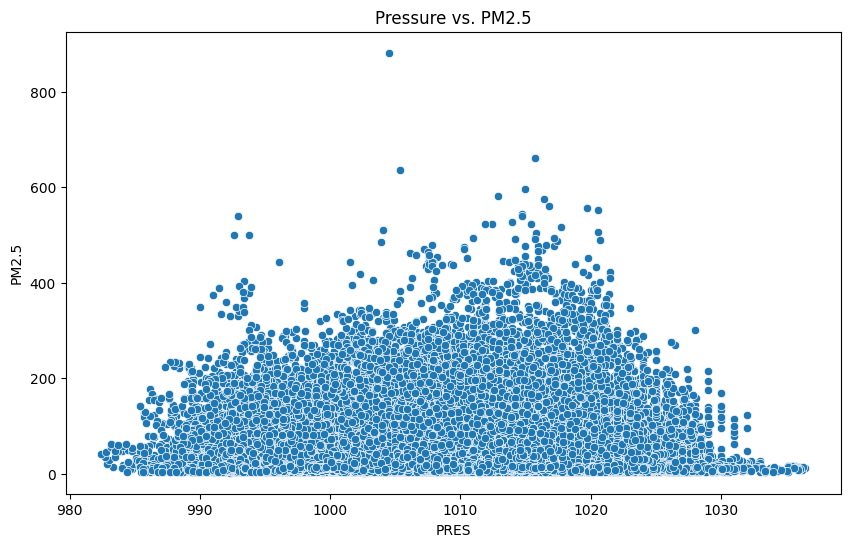

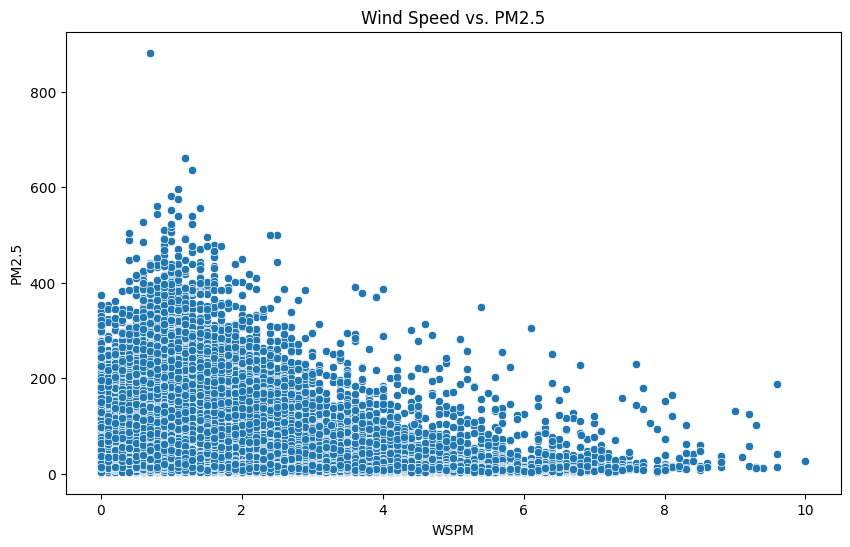

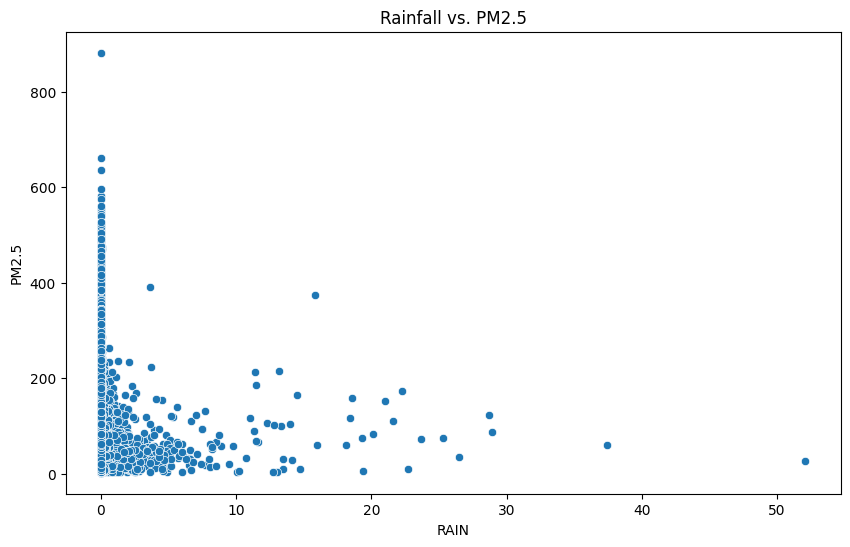

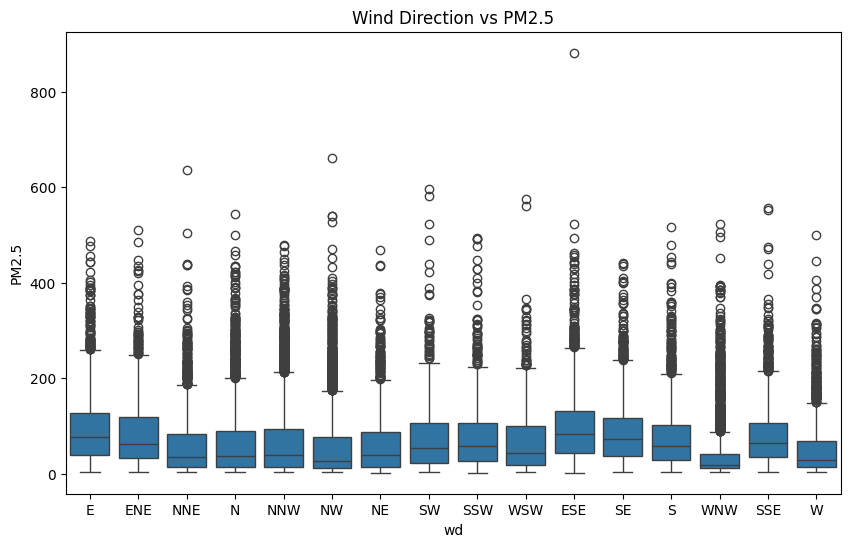

In [27]:

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix[['PM2.5']].sort_values(by='PM2.5', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of PM2.5 with other factors')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=df)
plt.title('Temperature vs. PM2.5')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRES', y='PM2.5', data=df)
plt.title('Pressure vs. PM2.5')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=df)
plt.title('Wind Speed vs. PM2.5')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAIN', y='PM2.5', data=df)  # Wind speed
plt.title('Rainfall vs. PM2.5')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='wd', y='PM2.5', data=df)
plt.title('Wind Direction vs PM2.5')
plt.show()

## Conclusion



1.   Tingkat PM2.5 di Changping menunjukkan fluktuasi yang signifikan sepanjang periode waktu pengamatan. Terdapat periode dengan tingkat PM2.5 yang tinggi dan periode dengan tingkat PM2.5 yang rendah.
 Terlihat adanya pola musiman dalam tingkat PM2.5. Rata-rata bulanan PM2.5 cenderung lebih tinggi selama musim dingin (bulan-bulan akhir dan awal tahun) dan lebih rendah selama musim panas (bulan-bulan pertengahan tahun).
Tahun 2014: Visualisasi data tahun 2014 menunjukkan pola yang serupa dengan tren umum, dengan fluktuasi yang cukup tinggi sepanjang tahun tersebut.
Interpretasi:
 Fluktuasi tingkat PM2.5 dapat dipengaruhi oleh berbagai faktor, termasuk emisi dari sumber-sumber polusi (seperti industri, kendaraan bermotor, dan pembakaran biomassa), kondisi meteorologi (seperti kecepatan angin, suhu, dan curah hujan), dan faktor-faktor lainnya.
Pola Musiman: Pola musiman dalam tingkat PM2.5 kemungkinan besar terkait dengan kondisi meteorologi dan pola aktivitas manusia. Pada musim dingin, kondisi atmosfer yang lebih stabil dan peningkatan pembakaran bahan bakar untuk pemanasan dapat menyebabkan peningkatan konsentrasi PM2.5.
Analisis Lebih Lanjut: Untuk pemahaman yang lebih mendalam, perlu dilakukan analisis lebih lanjut yang mempertimbangkan faktor-faktor lain yang berkorelasi dengan tingkat PM2.5, seperti data meteorologi, data emisi, dan data aktivitas manusia.


2.   

*   PM2.5 memiliki korelasi positif yang sangat kuat dengan PM10 (0.86),menunjukkan bahwa konsentrasi PM2.5 cenderung meningkat seiring dengan peningkatan konsentrasi PM10. Hal ini wajar karena PM2.5 merupakan bagian dari PM10.menunjukkan bahwa konsentrasi PM2.5 cenderung meningkat seiring dengan peningkatan konsentrasi PM10. Hal ini wajar karena PM2.5 merupakan bagian dari PM10.SO2, NO2, CO: PM2.5 juga berkorelasi positif dengan SO2 (0.53), NO2 (0.56), dan CO (0.76). Ini mengindikasikan bahwa sumber-sumber polusi yang menghasilkan gas-gas tersebut (seperti pembakaran bahan bakar fosil) juga berkontribusi terhadap peningkatan konsentrasi PM2.5.
DEWP, TEMP, PRES: PM2.5 memiliki korelasi negatif yang moderat dengan DEWP (titik embun) (-0.24), TEMP (suhu) (-0.10), dan PRES (tekanan) (-0.16). Hal ini menunjukkan bahwa konsentrasi PM2.5 cenderung lebih rendah pada suhu yang lebih tinggi, tekanan yang lebih rendah, dan titik embun yang lebih rendah.
WSPM, RAIN: PM2.5 memiliki korelasi negatif yang lemah dengan WSPM (kecepatan angin) (-0.34) dan RAIN (curah hujan) (-0.06). Ini menunjukkan bahwa kecepatan angin yang lebih tinggi dan curah hujan dapat membantu mengurangi konsentrasi PM2.5, meskipun pengaruhnya tidak terlalu kuat.

*Data menunjukkan bahwa sumber-sumber polusi yang menghasilkan PM10, SO2, NO2, dan CO berkontribusi signifikan terhadap konsentrasi PM2.5 di Changping.
Faktor Meteorologi: Kondisi meteorologi seperti suhu, tekanan, kecepatan angin, dan curah hujan juga memengaruhi konsentrasi PM2.5, meskipun pengaruhnya tidak sekuat sumber polusi. Kecepatan angin yang lebih tinggi dan curah hujan cenderung mengurangi konsentrasi PM2.5, sementara suhu dan tekanan yang lebih tinggi cenderung meningkatkannya.
Arah Angin: Arah angin memiliki peran penting dalam penyebaran polutan dan dapat memengaruhi konsentrasi PM2.5 di Changping.
